# Importamos librerías

In [2]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model
import numpy as np

# montar Google Drive
from google.colab import drive
#drive.mount('/content/gdrive')

from PIL import Image
from pathlib import Path
import numpy as np
import os.path
from os import path

# Clase para extraer features de imagen

In [3]:
class FeatureExtractor:
    def __init__(self):
        base_model = VGG16(weights='imagenet')
        self.model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc1').output)

    def extract(self, img):
        """
        Extract a deep feature from an input image
        Args:
            img: from PIL.Image.open(path) or tensorflow.keras.preprocessing.image.load_img(path)
        Returns:
            feature (np.ndarray): deep feature with the shape=(4096, )
        """
        img = img.resize((224, 224))  # VGG must take a 224x224 img as an input
        img = img.convert('RGB')  # Make sure img is color
        x = image.img_to_array(img)  # To np.array. Height x Width x Channel. dtype=float32
        x = np.expand_dims(x, axis=0)  # (H, W, C)->(1, H, W, C), where the first elem is the number of img
        x = preprocess_input(x)  # Subtracting avg values for each pixel
        feature = self.model.predict(x)[0]  # (1, 4096) -> (4096, )
        return feature / np.linalg.norm(feature)  # Normalize

# Extraer features de todas las imágenes del dataset
Guardamos los features de cada imagen en un archivo nombredeimagen.npy



**El proceso demora por lo que sólo lo ejecutamos una vez para crear los archivos, luego leemos los vectores de cada archivo**

In [ ]:
#ejecutar solo una vez para guardar los features de cada img
#fe = FeatureExtractor()

#for img_path in sorted(Path("/content/drive/MyDrive/Poyecto_Final_EML/Img_Calzado").glob("*.jpg")):
    #feature = fe.extract(img=Image.open(img_path))
    #feature_path = Path("/content/drive/MyDrive/EML/features") / (img_path.stem + ".npy")  # e.g., ./static/feature/xxx.npy
    #np.save(feature_path, feature)



# Búsqueda en todo el dataset
Cargamos todos los features del dataset

In [ ]:
fe = FeatureExtractor()
features = []
img_paths = []
for feature_path in Path("/content/drive/MyDrive/EML/features").glob("*.npy"):
    try:
      features.append(np.load(feature_path,allow_pickle=True))
      img_paths.append(Path("/content/drive/MyDrive/Poyecto_Final_EML/Img_Calzado") / (feature_path.stem + ".jpg"))
    except:
      print("cant load ",feature_path)  
features = np.array(features)

553476096/553467096 [==============================] - 3s 0us/step
cant load  /content/drive/MyDrive/EML/features/001.006036871_1.npy
cant load  /content/drive/MyDrive/EML/features/069.047838000_1.npy
cant load  /content/drive/MyDrive/EML/features/069.050134850_1.npy
cant load  /content/drive/MyDrive/EML/features/108.231021000_1.npy
cant load  /content/drive/MyDrive/EML/features/108.231100199_1.npy
cant load  /content/drive/MyDrive/EML/features/108.876010199_1.npy


Cargamos la información de todos los productos del dataset

In [4]:
import pandas as pd
#cargamos la info de todos los productos
articulos=pd.read_csv('/content/drive/MyDrive/Poyecto_Final_EML/Articulos.csv', index_col=0)
#Eliminamos articulos duplicados, para un BaseCol existen varios idArticulo 
articulos.drop_duplicates(subset ="BaseCol", keep = 'last', inplace = True)
articulos.head()

,BaseCol,Fecha,PRECIO,DescripcionMarca,IdMarca,IdCategoria,DescripcionCategoria,IdSeccion,DescripcionSeccion,IdGenero,DescripcionGenero,stockSKU,stockBaseColor,DescripcionArticulo,idClase,DescripcionClase,tags,tag1,idProveedor,Q_Vendidos
IdArticulo,,,,,,,,,,,,,,,,,,,,
0001001,0001001,2021-01-04,4784.84,{Sin Definir},0.0,0.0,{Sin Definir},0.0,{Sin Definir},0.0,{Sin Definir},0,0,RECUPERO ARANCELES,0.0,{Sin Definir},NaN,NaN,0.0,18
0006000,0006000,2021-01-04,2065.20,{Sin Definir},0.0,0.0,{Sin Definir},0.0,{Sin Definir},0.0,{Sin Definir},0,0,Descuento Comercial,0.0,{Sin Definir},NaN,NaN,0.0,663
0002000,0002000,2021-01-04,7281.76,{Sin Definir},0.0,0.0,{Sin Definir},0.0,{Sin Definir},0.0,{Sin Definir},1,0,Costo envio,0.0,{Sin Definir},NaN,NaN,0.0,50709
0009010,0009010,2021-01-04,103.00,{Sin Definir},0.0,0.0,{Sin Definir},0.0,{Sin Definir},0.0,{Sin Definir},0,0,MORA POR DEUDA,0.0,{Sin Definir},NaN,NaN,0.0,1297
0001146,0001146,2021-01-04,0.00,INSUMOS,99.0,0.0,{Sin Definir},96.0,Insumos,0.0,{Sin Definir},16442,14526,Bolsa obsequio - MISSCAROL,0.0,{Sin Definir},NaN,NaN,0.0,11


Cargo el producto a buscar y obtengo sus datos 

In [5]:
#codigo del producto al que buscaremos similares
codigo_buscado='009.363920201'
#buscamos los datos del producto en 
datos_a_buscar=articulos.loc[articulos['BaseCol'] == codigo_buscado]
datos_a_buscar


,BaseCol,Fecha,PRECIO,DescripcionMarca,IdMarca,IdCategoria,DescripcionCategoria,IdSeccion,DescripcionSeccion,IdGenero,DescripcionGenero,stockSKU,stockBaseColor,DescripcionArticulo,idClase,DescripcionClase,tags,tag1,idProveedor,Q_Vendidos
IdArticulo,,,,,,,,,,,,,,,,,,,,
009.36392020109.0,009.363920201,2022-05-20,4890.0,Adidas,9.0,1.0,Adulto,2.0,Calzados,2.0,Masculino,35,179,Grand Court - Ref.DF36392,2.0,Deportivo,NaN,NaN,12296.0,43


Buscamos las imágenes similares utilizando VGG16

In [ ]:
import cv2
#Cargo la img a buscar
img=image.load_img("/content/drive/MyDrive/Poyecto_Final_EML/Img_Calzado/"+codigo_buscado+"_1.jpg")

#Hacemos la búsqueda
fe = FeatureExtractor()
query = fe.extract(img)
dists = np.linalg.norm(features-query, axis=1)  # L2 distances to features
ids = np.argsort(dists)[:8]  # Top 8 results
scores = [(dists[id], img_paths[id]) for id in ids]
scores

[(0.0,
  PosixPath('/content/drive/MyDrive/Poyecto_Final_EML/Img_Calzado/009.363920201_1.jpg')),
 (0.71617734,
  PosixPath('/content/drive/MyDrive/Poyecto_Final_EML/Img_Calzado/009.363930102_1.jpg')),
 (0.7414663,
  PosixPath('/content/drive/MyDrive/Poyecto_Final_EML/Img_Calzado/051.807510285_1.jpg')),
 (0.76289856,
  PosixPath('/content/drive/MyDrive/Poyecto_Final_EML/Img_Calzado/009.Y52500201_1.jpg')),
 (0.7647828,
  PosixPath('/content/drive/MyDrive/Poyecto_Final_EML/Img_Calzado/021.0DARK3087_1.jpg')),
 (0.78114575,
  PosixPath('/content/drive/MyDrive/Poyecto_Final_EML/Img_Calzado/009.X36110002_1.jpg')),
 (0.78453285,
  PosixPath('/content/drive/MyDrive/Poyecto_Final_EML/Img_Calzado/057.221580064_1.jpg')),
 (0.7962342,
  PosixPath('/content/drive/MyDrive/Poyecto_Final_EML/Img_Calzado/001.559580205_1.jpg'))]

Imagen buscada

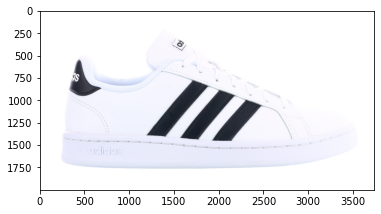

In [ ]:
#img buscada
import matplotlib.pyplot as plt
import numpy as np
#img = np.random.rand(224,224,3)
plt.imshow(img)
plt.show()

Imágenes sugeridas

0.0


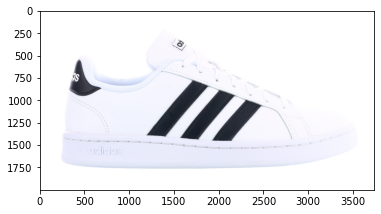

0.71617734


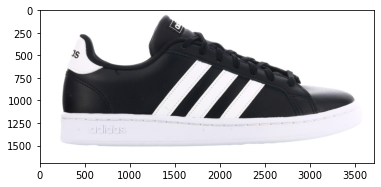

0.7414663


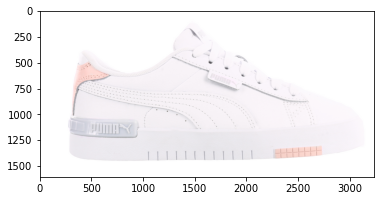

0.76289856


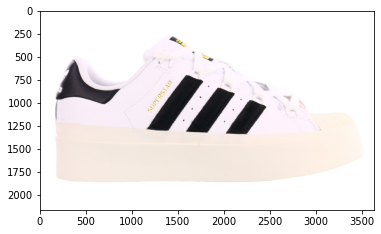

0.7647828


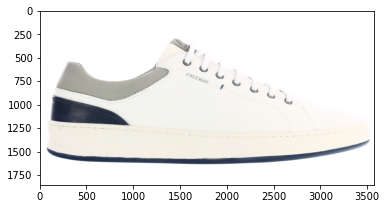

0.78114575


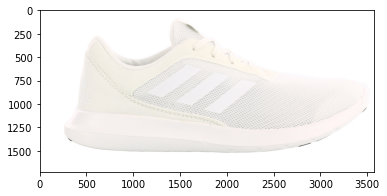

0.78453285


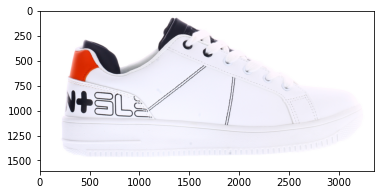

0.7962342


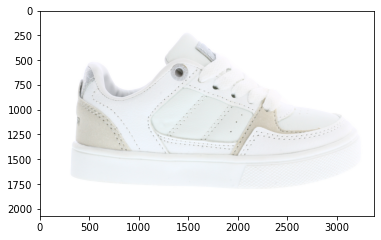

In [ ]:
#imgs sugeridas
for sugeridas in scores:
  print(sugeridas[0])
  img=image.load_img(sugeridas[1])
  plt.imshow(img)
  plt.show()

# Filtramos por datos del producto buscado

In [6]:
#filtro los articulos por los valores del item a buscar
datos_filtrados=articulos.loc[(articulos['IdCategoria'] == datos_a_buscar.IdCategoria.item()) & (articulos['IdSeccion'] == datos_a_buscar.IdSeccion.item()) & (articulos['DescripcionGenero'] == datos_a_buscar.DescripcionGenero.item()) & (articulos['idClase'] == datos_a_buscar.idClase.item())]
datos_filtrados

,BaseCol,Fecha,PRECIO,DescripcionMarca,IdMarca,IdCategoria,DescripcionCategoria,IdSeccion,DescripcionSeccion,IdGenero,DescripcionGenero,stockSKU,stockBaseColor,DescripcionArticulo,idClase,DescripcionClase,tags,tag1,idProveedor,Q_Vendidos
IdArticulo,,,,,,,,,,,,,,,,,,,,
057.N1904015745.0,057.N19040157,2021-02-04,986.58,North Sails N+,57.0,1.0,Adulto,2.0,Calzados,2.0,Masculino,25,40,DEPORTIVO TINI ACORDONADO CON COMBINACION DE MATE,2.0,Deportivo,NaN,NaN,3325.0,45
057.S2105006445.0,057.S21050064,2021-02-04,1041.58,North Sails N+,57.0,1.0,Adulto,2.0,Calzados,2.0,Masculino,37,2,Deportivo SHERMAN acordonado con recortes y mater,2.0,Deportivo,NaN,NaN,3267.0,87
057.S2106682945.0,057.S21066829,2021-02-05,890.01,North Sails N+,57.0,1.0,Adulto,2.0,Calzados,2.0,Masculino,11,1,Deportivo RENTON acordonado,2.0,Deportivo,NaN,NaN,3242.0,33
057.N1904014845.0,057.N19040148,2021-02-17,986.58,North Sails N+,57.0,1.0,Adulto,2.0,Calzados,2.0,Masculino,24,44,DEPORTIVO TINI ACORDONADO CON COMBINACION DE MATE,2.0,Deportivo,NaN,NaN,3325.0,49
057.S2104014845.0,057.S21040148,2021-02-17,1041.58,North Sails N+,57.0,1.0,Adulto,2.0,Calzados,2.0,Masculino,21,6,Deportivo HARRY acordonado con combinacion de mat,2.0,Deportivo,NaN,NaN,3324.0,74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
054.28140851545.0,054.281408515,2022-07-28,1990.00,Umbro,54.0,1.0,Adulto,2.0,Calzados,2.0,Masculino,1,2,Futbol 5 Velocita IV - Ref.281404,2.0,Deportivo,NaN,NaN,54.0,1
009.58892010213.0,009.588920102,2022-07-28,5301.00,Adidas,9.0,1.0,Adulto,2.0,Calzados,2.0,Masculino,11,102,Basket Pro N3XT - Ref.DG58892,2.0,Deportivo,NaN,NaN,12296.0,2
009.Q9957129310.0,009.Q99571293,2022-07-28,3591.00,Adidas,9.0,1.0,Adulto,2.0,Calzados,2.0,Masculino,35,228,Futbol 5 TF - Ref.HQ9957,2.0,Deportivo,NaN,NaN,12296.0,1


Cargamos los features correspondientes a los productos con mismos datos

In [7]:
features_filtrados=[]
img_paths_filtrados=[]
for item in datos_filtrados.values:
  try:
    features_filtrados.append(np.load("/content/drive/MyDrive/EML/features/"+item[0]+"_1.npy"))
    img_paths_filtrados.append(Path("/content/drive/MyDrive/Poyecto_Final_EML/Img_Calzado") / (item[0] + "_1.jpg"))
  except:
    print(item[0])

features_filtrados = np.array(features_filtrados)

184.997HH7103
184.1080C0905
168.084640110
001.796120001
045.395301010
051.190550105
184.997CA0005
054.037700102
058.018629991
168.D54420006
184.247BG0001
201.B19992000
201.B00010195
054.038900102
184.247WB0201
054.808240201
001.085480212
001.796110001
054.037706122
201.B90031000
201.B00012003
184.574KA0159
184.574KB9149
201.B19100148
201.B00011000
201.B19100038
201.B19990157
054.805401264
054.288720201
054.876090210
058.018628000
168.014320006
168.087890105
058.008161125
184.247FC0005
201.B90040070
184.CRUK20001
184.500US2341
009.048411112
001.246726200
001.500581350
058.018231022
201.B90041000
184.574KC5826
184.574TB0219
045.436771060
201.B19990148
009.G14127910
184.574EY5595
184.MCRM20099
168.N31750219
184.574TA0001
184.574PE1102
051.741212610
184.0U4465781
184.574SU1510
184.ML5271000
184.247PU0099
184.247FB0105
184.247RW1002
168.055540110
201.B00050064
168.N54100601
184.ML5270148
184.MCSB40105
201.B90011000
201.B00051000
184.515PC6557
054.038900502
201.B00050148
184.74SY20617
184.57

Buscamos las imágenes similares utilizando VGG16

In [8]:
import cv2
#cargo la img a buscar
img=image.load_img("/content/drive/MyDrive/Poyecto_Final_EML/Img_Calzado/"+codigo_buscado+"_1.jpg")

#Hacemos la búsqueda
fe = FeatureExtractor()
query = fe.extract(img)
dists = np.linalg.norm(features_filtrados-query, axis=1)  # L2 distances to features
ids = np.argsort(dists)[:8]  # Top 4 results
scores = [(dists[id], img_paths_filtrados[id]) for id in ids]
scores


[(0.0,
  PosixPath('/content/drive/MyDrive/Poyecto_Final_EML/Img_Calzado/009.363920201_1.jpg')),
 (0.71617734,
  PosixPath('/content/drive/MyDrive/Poyecto_Final_EML/Img_Calzado/009.363930102_1.jpg')),
 (0.78453285,
  PosixPath('/content/drive/MyDrive/Poyecto_Final_EML/Img_Calzado/057.221580064_1.jpg')),
 (0.79973006,
  PosixPath('/content/drive/MyDrive/Poyecto_Final_EML/Img_Calzado/009.Y63460002_1.jpg')),
 (0.8023674,
  PosixPath('/content/drive/MyDrive/Poyecto_Final_EML/Img_Calzado/051.848550002_1.jpg')),
 (0.805743,
  PosixPath('/content/drive/MyDrive/Poyecto_Final_EML/Img_Calzado/009.Y60750201_1.jpg')),
 (0.80728745,
  PosixPath('/content/drive/MyDrive/Poyecto_Final_EML/Img_Calzado/001.447980002_1.jpg')),
 (0.8111034,
  PosixPath('/content/drive/MyDrive/Poyecto_Final_EML/Img_Calzado/009.W32772105_1.jpg'))]

Imagen buscada

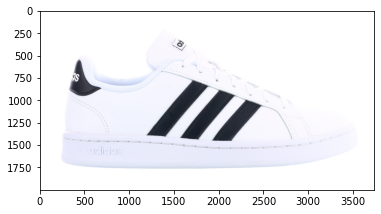

In [9]:
#img buscada
import matplotlib.pyplot as plt
import numpy as np
#img = np.random.rand(224,224,3)
plt.imshow(img)
plt.show()

Imágenes Sugeridas

0.0


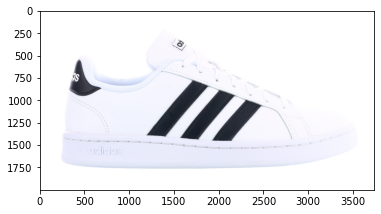

0.71617734


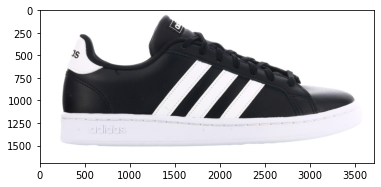

0.78453285


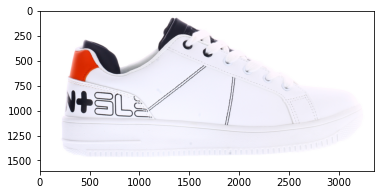

0.79973006


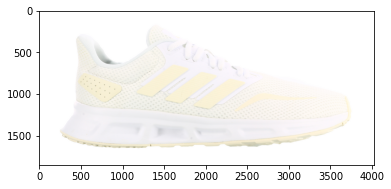

0.8023674


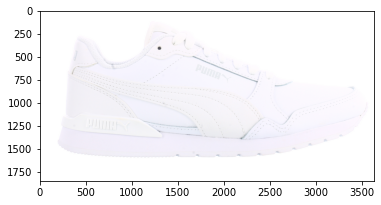

0.805743


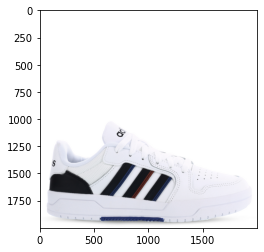

0.80728745


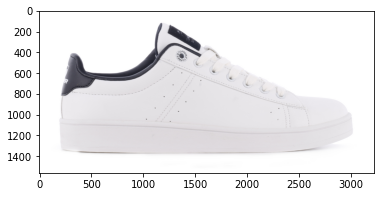

0.8111034


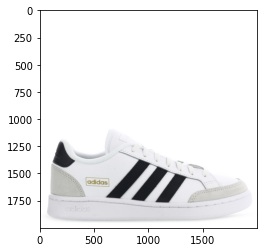

In [10]:
#imgs sugeridas
for sugeridas in scores:
  print(sugeridas[0])
  img=image.load_img(sugeridas[1])
  plt.imshow(img)
  plt.show()